In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

source : https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

In [2]:
df_telco = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df_telco.shape

(7043, 33)

In [4]:
df_telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df_telco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

Data:
1. Geographical
2. Demographical
3. Services
4. profile

In [6]:
geos = ['Country', 'State', 'City', 'Zip Code','Lat Long', 'Latitude', 'Longitude']
demog = ['Gender', 'Senior Citizen','Partner', 'Dependents','Tenure Months']
services = ['Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']
profile = ['Churn Label', 'Churn Value','Churn Score', 'CLTV', 'Churn Reason']

In [7]:
df_telco[geos].head()

,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783
1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420
2,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953
3,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709
4,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293


In [8]:
df_telco[demog].head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months
0,Male,No,No,No,2
1,Female,No,No,Yes,2
2,Female,No,No,Yes,8
3,Female,No,Yes,Yes,28
4,Male,No,No,Yes,49


In [9]:
df_telco[services].head()

,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
3,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3


In [10]:
df_telco[profile].head()

,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Yes,1,86,3239,Competitor made better offer
1,Yes,1,67,2701,Moved
2,Yes,1,86,5372,Moved
3,Yes,1,84,5003,Moved
4,Yes,1,89,5340,Competitor had better devices


# Geographical

In [11]:
df_telco[geos].head()

,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783
1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420
2,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953
3,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709
4,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293


In [12]:
df_telco['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [13]:
df_telco['State'].value_counts()

State
California    7043
Name: count, dtype: int64

In [14]:
df_telco['City'].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [15]:
df_telco['City'].nunique()

1129

<Axes: xlabel='Latitude', ylabel='Longitude'>

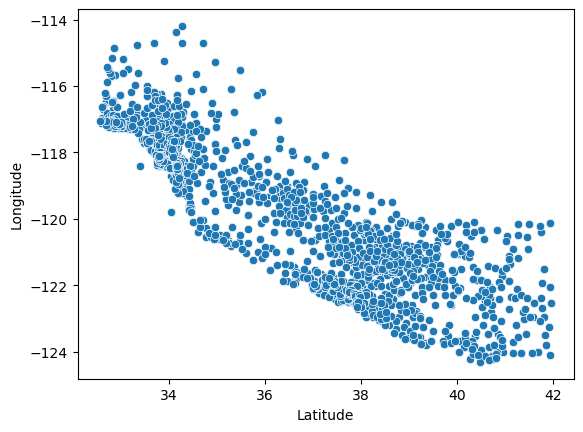

In [16]:
sns.scatterplot(data = df_telco, x = 'Latitude', y = 'Longitude')

# Demographic

In [17]:
df_telco[demog].head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months
0,Male,No,No,No,2
1,Female,No,No,Yes,2
2,Female,No,No,Yes,8
3,Female,No,Yes,Yes,28
4,Male,No,No,Yes,49


In [18]:
df_telco['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [19]:
df_telco['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

In [20]:
df_telco['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [21]:
df_telco['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

<Axes: xlabel='Tenure Months', ylabel='Count'>

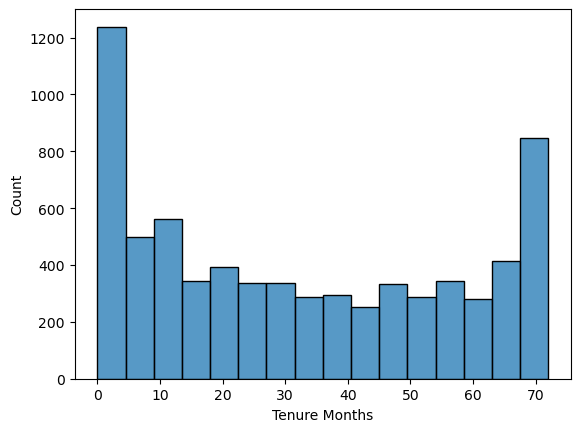

In [22]:
sns.histplot(
    data = df_telco, 
    x = 'Tenure Months'
    #', element='step', stat='density', common_norm=False
)

# Services

In [23]:
df_telco[services].head()

,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5
3,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3


In [24]:
df_telco['Phone Service'].value_counts()

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

In [25]:
df_telco['Multiple Lines'].value_counts()

Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [26]:
df_telco['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [27]:
df_telco['Online Security'].value_counts()

Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [28]:
df_telco['Online Backup'].value_counts()

Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [29]:
df_telco['Device Protection'].value_counts()

Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [30]:
df_telco['Tech Support'].value_counts()

Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [31]:
df_telco['Streaming TV'].value_counts()

Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [32]:
df_telco['Streaming Movies'].value_counts()

Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [33]:
df_telco['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [34]:
df_telco['Paperless Billing'].value_counts()

Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

In [35]:
df_telco['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

<Axes: xlabel='Monthly Charges', ylabel='Count'>

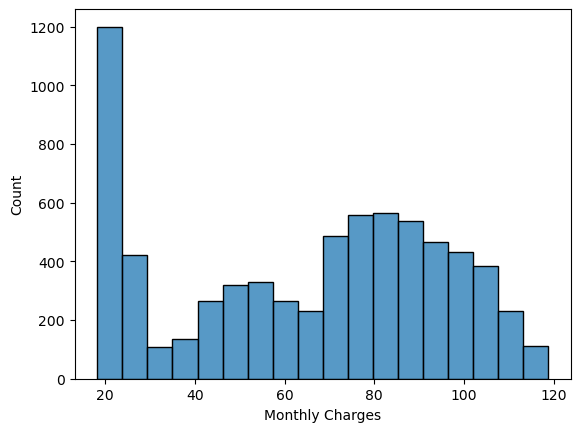

In [36]:
sns.histplot(
    data = df_telco, 
    x = 'Monthly Charges'
    #', element='step', stat='density', common_norm=False
)

In [37]:
df_telco['Total Charges2'] = df_telco['Total Charges'].astype(str)

In [38]:
df_telco[['Monthly Charges','Total Charges','Total Charges2']].sort_values('Total Charges2')[:20]

,Monthly Charges,Total Charges,Total Charges2
4331,19.85,,
6840,61.90,,
6772,73.35,,
4687,25.35,,
2856,56.05,,
2234,52.55,,
5104,20.00,,
5719,19.70,,
2438,20.25,,
2568,80.85,,


<Axes: xlabel='Total Charges', ylabel='Count'>

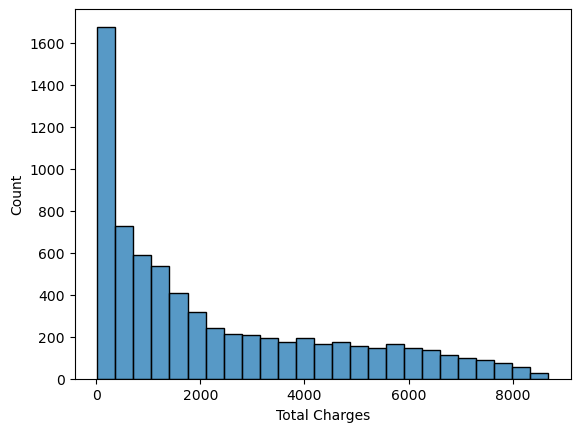

In [39]:
sns.histplot(
    data = df_telco.sort_values('Total Charges2')[13:], 
    x = 'Total Charges'
)

# Churn Dsitribution

In [40]:
df_telco['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b968b719a0>,
 [Text(-0.8144539368428058, -0.7393678277834755, 'No'),
  Text(0.8144540060674139, 0.7393677515287918, 'Yes')],
 [Text(-0.44424760191425766, -0.40329154242735027, '73.5%'),
  Text(0.4442476396731348, 0.4032915008338864, '26.5%')])

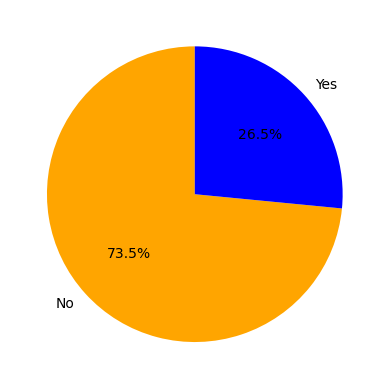

In [41]:
churn_summary = 100*df_telco['Churn Label'].value_counts()/df_telco.shape[0]

plt.pie(
    churn_summary, 
    labels=churn_summary.keys(),
    colors = ['orange','blue'],
    autopct='%1.1f%%', startangle=90)

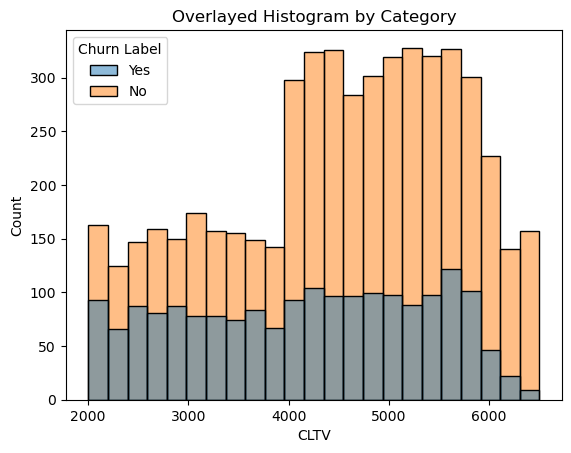

In [42]:
sns.histplot(
    data = df_telco, 
    x = 'CLTV', 
    hue = 'Churn Label'
    #', element='step', stat='density', common_norm=False
)
plt.title("Overlayed Histogram by Category")
plt.show()

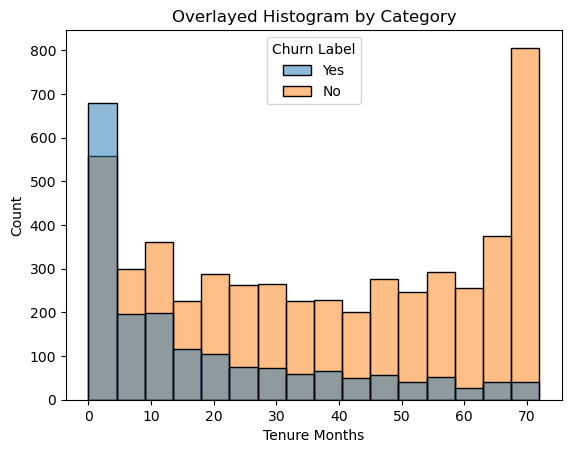

In [43]:
sns.histplot(
    data = df_telco, 
    x = 'Tenure Months', 
    hue = 'Churn Label'
    #', element='step', stat='density', common_norm=False
)
plt.title("Overlayed Histogram by Category")
plt.show()

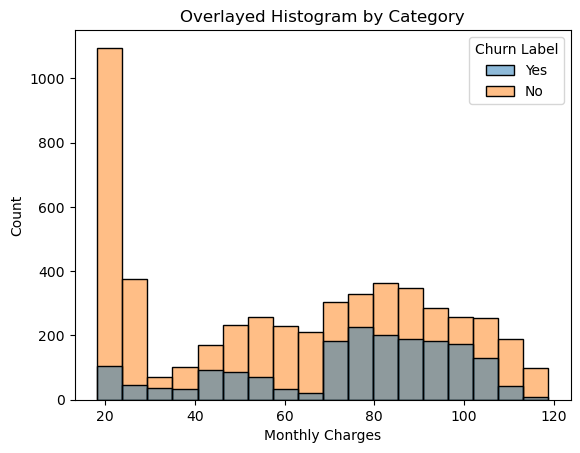

In [44]:
sns.histplot(
    data = df_telco, 
    x = 'Monthly Charges', 
    hue = 'Churn Label'
    #', element='step', stat='density', common_norm=False
)
plt.title("Overlayed Histogram by Category")
plt.show()

<Axes: xlabel='Total Charges', ylabel='Count'>

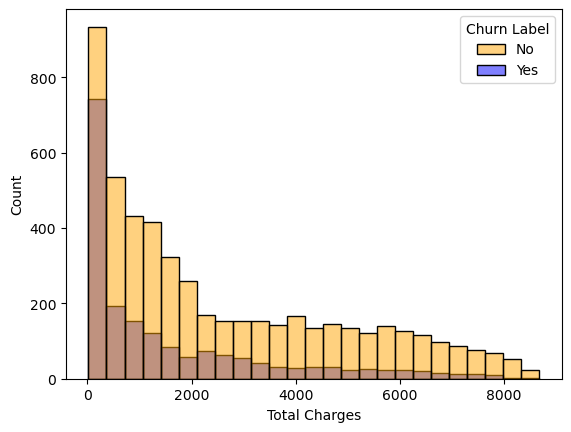

In [45]:
custom_palette = {'Yes': 'blue', 'No': 'orange'}

sns.histplot(
    data = df_telco.sort_values('Total Charges2')[13:], 
    x = 'Total Charges',
    hue = 'Churn Label',
    palette = custom_palette
)

# Churn Reason

In [46]:
df_telco['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c